In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import json


#### Ler o Jason e Visualizar as primeiras linhas

In [21]:
df = pd.read_json('../data/transacoes_cartoes_2023.json', orient='records', encoding='utf-8')
df.head()

,nomeBandeira,nomeFuncao,modalidade,qtdCartoesEmitidos,qtdCartoesAtivos
0,VISA,Débito,Puro,739765,404801
1,MasterCard,Crédito,Puro,983369,771386
2,MasterCard,Crédito,Puro,13454781,5296965
3,VISA,Débito,Puro,1017551,525736
4,Elo,Crédito,Puro,28306,11255


#### Colunas, estatísticas básicas e contagem por bandeira

In [22]:
print(df.columns)

df.describe()

df['nomeBandeira'].value_counts()

Index(['nomeBandeira', 'nomeFuncao', 'modalidade', 'qtdCartoesEmitidos',
       'qtdCartoesAtivos'],
      dtype='object')


nomeBandeira
MasterCard           47
VISA                 33
Elo                  12
American Express      3
Bandeira própria      2
Outras                2
Cheque Eletrônico     1
Name: count, dtype: int64

In [33]:
resumo = df.groupby(['nomeBandeira','nomeFuncao'])[['qtdCartoesEmitidos','qtdCartoesAtivos','percentualAtivos']].sum()
resumo


qtdCartoesEmitidos  qtdCartoesAtivos  \
nomeBandeira      nomeFuncao                                         
American Express  Crédito                 447364            341386   
Bandeira própria  Crédito                4861653           4385477   
Cheque Eletrônico Débito                  543861            370916   
Elo               Crédito                 890348            575965   
                  Débito                15398880           4868225   
                  Pré-Pago                  6770                 0   
MasterCard        Crédito              255629527         131452480   
                  Débito                48534566          18826888   
                  Pré-Pago                626882            333084   
Outras            Crédito                1496771            257998   
VISA              Crédito              125332552          74465834   
                  Débito               152838228          43152467   
                  Pré-Pago               2746201            442844   

                              percentualAtivos  
nomeBandeira      nomeFuncao                    
American Express  Crédito           200.590956  
Bandeira própria  Crédito           145.855681  
Cheque Eletrônico Débito             68.200514  
Elo               Crédito           376.647547  
                  Débito             52.866390  
                  Pré-Pago            0.000000  
MasterCard        Crédito          1638.674490  
                  Débito            248.267565  
                  Pré-Pago          392.183424  
Outras            Crédito            57.776945  
VISA              Crédito           910.999711  
                  Débito            510.193694  
                  Pré-Pago           60.553092

#### Volta a ver primeiras linhas, mostra os tipos de dados e as estatísticas básicas do df

In [14]:
df.head()

df.dtypes

df.describe()


,qtdCartoesEmitidos,qtdCartoesAtivos
count,1.000000e+02,1.000000e+02
mean,6.093536e+06,2.794736e+06
std,1.714994e+07,6.923180e+06
min,9.000000e+01,0.000000e+00
25%,5.000800e+04,1.569275e+04
50%,6.941120e+05,2.850030e+05
75%,5.838286e+06,3.307278e+06
max,1.421303e+08,4.947266e+07


#### Total geral de cartões eimitidos e ativos

In [15]:
total_emitidos = df['qtdCartoesEmitidos'].sum()
total_ativos = df['qtdCartoesAtivos'].sum()

print(f"Total de cartões emitidos: {total_emitidos}")
print(f"Total de cartões ativos: {total_ativos}")


Total de cartões emitidos: 609353603
Total de cartões ativos: 279473564


#### Agrupando por nomeBandeira e nomeFuncao 

In [16]:
agrupado = df.groupby(['nomeBandeira', 'nomeFuncao'])[['qtdCartoesEmitidos', 'qtdCartoesAtivos']].sum()
agrupado


qtdCartoesEmitidos  qtdCartoesAtivos
nomeBandeira      nomeFuncao                                      
American Express  Crédito                 447364            341386
Bandeira própria  Crédito                4861653           4385477
Cheque Eletrônico Débito                  543861            370916
Elo               Crédito                 890348            575965
                  Débito                15398880           4868225
                  Pré-Pago                  6770                 0
MasterCard        Crédito              255629527         131452480
                  Débito                48534566          18826888
                  Pré-Pago                626882            333084
Outras            Crédito                1496771            257998
VISA              Crédito              125332552          74465834
                  Débito               152838228          43152467
                  Pré-Pago               2746201            442844

# Usando Matplotlib 

#### Analisando cartões emitidos por bandeira 

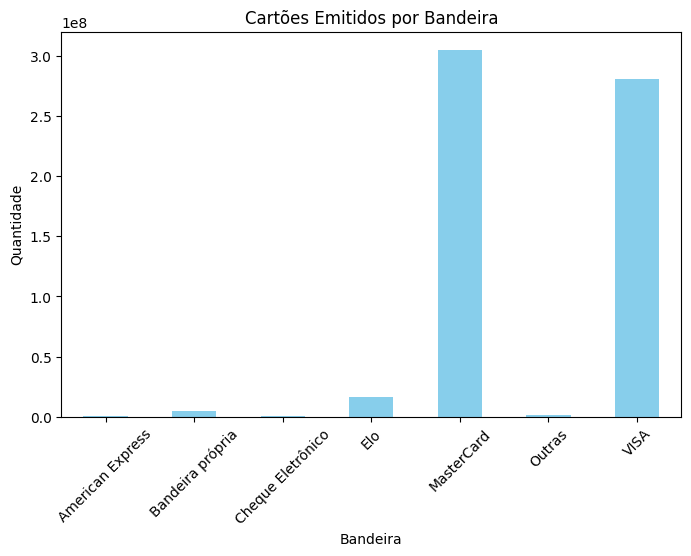

In [17]:
import matplotlib.pyplot as plt

agrupado_emitidos = df.groupby('nomeBandeira')['qtdCartoesEmitidos'].sum()

plt.figure(figsize=(8,5))
agrupado_emitidos.plot(kind='bar', color='skyblue')
plt.title('Cartões Emitidos por Bandeira')
plt.ylabel('Quantidade')
plt.xlabel('Bandeira')
plt.xticks(rotation=45)
plt.show()


#### Analisando percentual de cartões ativos por bandeira

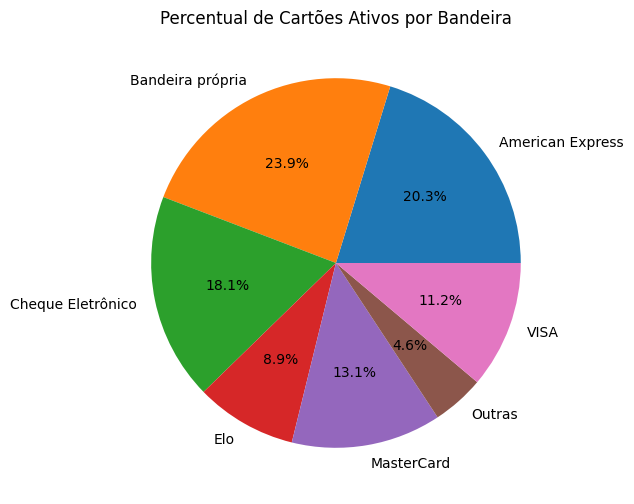

In [20]:
plt.figure(figsize=(6,6))
plt.pie(percentual_ativos['percentualAtivos'], labels=percentual_ativos.index, autopct='%1.1f%%')
plt.title('Percentual de Cartões Ativos por Bandeira')
plt.show()


#### Agrupando por função e montando um gráfico de pizza de cartões ativos por função

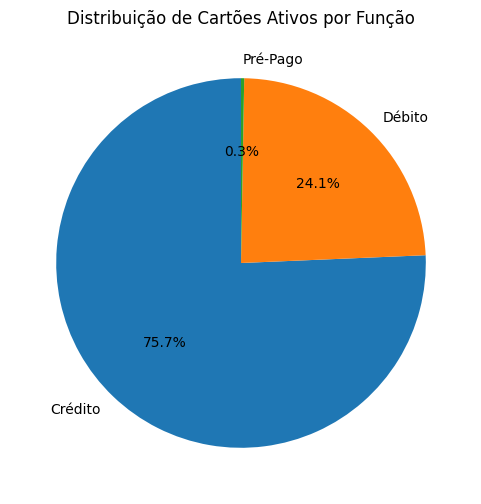

In [24]:
funcao_agrupada = df.groupby('nomeFuncao')[['qtdCartoesEmitidos','qtdCartoesAtivos']].sum()

plt.figure(figsize=(6,6))
plt.pie(funcao_agrupada['qtdCartoesAtivos'], labels=funcao_agrupada.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Cartões Ativos por Função')
plt.show()


#### Agrupando por bandeira e função, quantidade percentual de cartões emitidos e ativos por bandeira e função

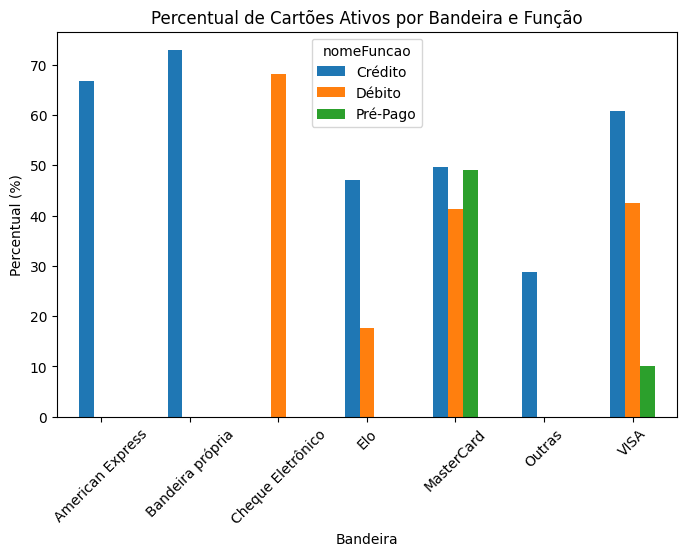

In [32]:
# Criar coluna de percentual de ativos
df['percentualAtivos'] = df['qtdCartoesAtivos'] / df['qtdCartoesEmitidos'] * 100

# Agrupar
percent_bandeira_funcao = df.groupby(['nomeBandeira','nomeFuncao'])['percentualAtivos'].mean().unstack()

# Gráfico
percent_bandeira_funcao.plot(kind='bar', figsize=(8,5))
plt.title('Percentual de Cartões Ativos por Bandeira e Função')
plt.ylabel('Percentual (%)')
plt.xlabel('Bandeira')
plt.xticks(rotation=45)
plt.show()
